# Logistic Regression

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path

from src.features.build_features import train_test_split, StandardScaler, MinMaxScaler
from src.models import LogisticRegressor

## Data Processing

In [5]:
data_path = Path("./Social_Network_Ads.csv")
df = pd.read_csv(data_path, index_col=0).rename(lambda x: x.strip(), axis=1)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [7]:
df = df.replace(to_replace={'Male':0, 'Female':1})

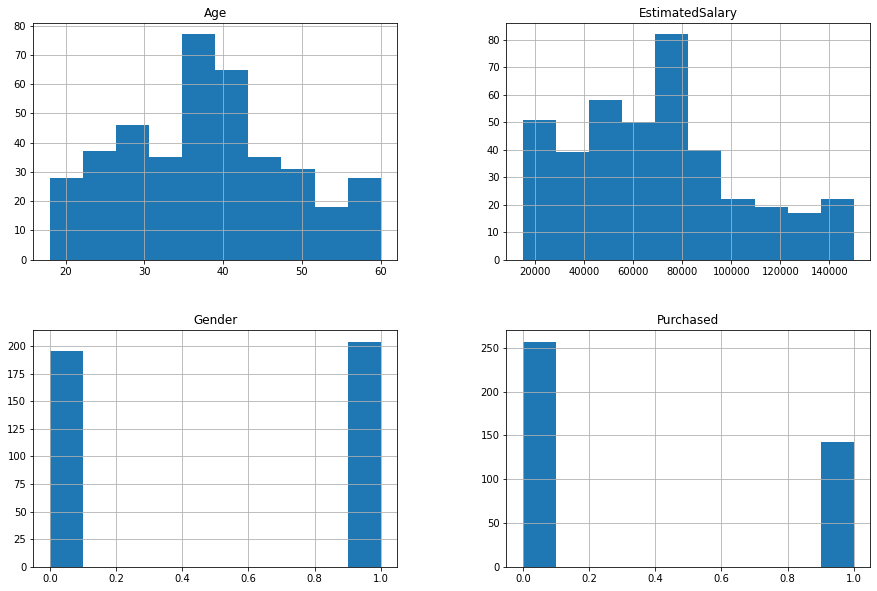

In [8]:
hist = hist = df.hist(figsize=(15, 10))

In [9]:
X =  df.drop('Purchased', axis=1)
y = df['Purchased']

In [10]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

## Maximum Likelihood

In [66]:
likelihood_regr = LogisticRegressor(method='max_likelihood', lr=0.005, epochs=1000, normalize=True, add_intercept=True)

CPU times: user 55.9 ms, sys: 4.15 ms, total: 60.1 ms
Wall time: 56.6 ms


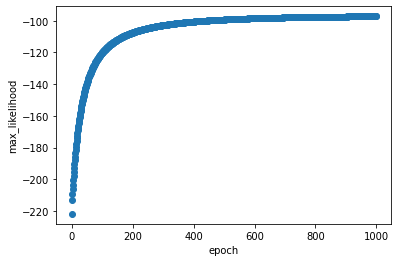

In [78]:
%%time
likelihood_regr.fit(X_train, y_train)

In [69]:
likelihood_regr.get_weights()

array([-8.15689725, -0.30223086, 10.74221212,  5.31155416])

In [70]:
print("Accuracy Score: {}".format(likelihood_regr.score(X_test, y_test, metric='accuracy')))
for key, value in likelihood_regr.score(X_test, y_test, metric='recall').items():
    print("Recall for class {}: {}".format(key, value))

Accuracy Score: 0.775
Recall for class 0: 0.8867924528301887
Recall for class 1: 0.5555555555555556


## Minimize Cross Entropy

In [74]:
entropy_regr = LogisticRegressor(method='cross_entropy', lr=0.05, epochs=30000, normalize=True, add_intercept=True)

CPU times: user 1.06 s, sys: 4.82 ms, total: 1.06 s
Wall time: 1.06 s


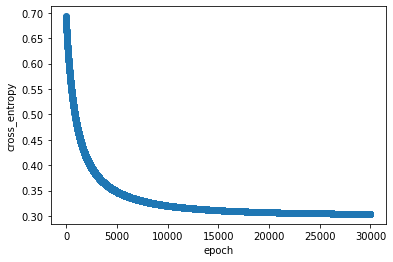

In [79]:
%%time
entropy_regr.fit(X_train, y_train)

In [76]:
entropy_regr.get_weights()

array([-8.05648399, -0.29761456, 10.60562014,  5.24154614])

In [77]:
print("Accuracy Score: {}".format(entropy_regr.score(X_test, y_test, metric='accuracy')))
for key, value in entropy_regr.score(X_test, y_test, metric='recall').items():
    print("Recall for class {}: {}".format(key, value))

Accuracy Score: 0.775
Recall for class 0: 0.8867924528301887
Recall for class 1: 0.5555555555555556
